In [1]:
import pandas as pd

import tensorflow as tf

## Importing the data 

In [39]:
my_data = pd.read_csv('citrus.csv')

In [40]:
my_data

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [47]:
train_df = my_data.sample(frac=1, random_state=42)

In [48]:
train_df

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2
...,...,...,...,...,...,...
5734,grapefruit,10.18,176.92,145,77,15
5191,grapefruit,9.32,162.56,159,69,28
5390,grapefruit,9.72,169.85,150,67,10
860,orange,7.29,135.10,154,72,8


In [49]:
X = train_df.iloc[:,1:]

In [50]:
y = train_df['name']

In [51]:
X.shape

(10000, 5)

In [52]:
y.shape

(10000,)

## Changing the categorical values to numerical values/


In [53]:
y.replace(['orange', 'grapefruit'],
                        [0, 1], inplace=True)

In [54]:
y

6252    1
4684    0
1731    0
4742    0
4521    0
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: name, Length: 10000, dtype: int64

In [55]:
X

,diameter,weight,red,green,blue
6252,10.66,184.37,166,60,18
4684,10.40,181.34,166,109,13
1731,7.99,145.45,150,72,2
4742,10.55,182.99,151,84,2
4521,10.10,177.31,160,72,2
...,...,...,...,...,...
5734,10.18,176.92,145,77,15
5191,9.32,162.56,159,69,28
5390,9.72,169.85,150,67,10
860,7.29,135.10,154,72,8


## Train and test split

In [56]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split (X, y, test_size = 0.2 ,random_state = 42)

In [62]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((8000, 5), (8000,), (2000, 5), (2000,))

## Model 1 with learning rate callback 

In [85]:
# Random seed
 
tf.random.set_seed(42)

# Model initialization

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile the model

model.compile(loss = tf.keras.losses.binary_crossentropy,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['Accuracy'])

# Creating a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)
                                                       )

#Fit the model

history = model.fit(X_train,y_train, epochs = 50, validation_data= (X_test,y_test), callbacks = [lr_sheduler])
                   
                    
                    

Epoch 1/50
250/250 [==============================] - 1s 4ms/step - loss: 0.3231 - Accuracy: 0.8898 - val_loss: 0.1702 - val_Accuracy: 0.9285
Epoch 2/50
107/250 [===========>..................] - ETA: 0s - loss: 0.2164 - Accuracy: 0.9112

KeyboardInterrupt: 

### Readjust the learning rate as per the below figure 

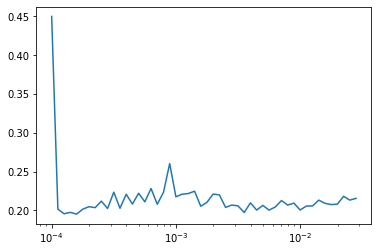

In [69]:
import matplotlib.pyplot as plt

plt.semilogx(history2.history['lr'],history2.history['loss'])

### Visualize valid accuracy and training accuracy to check if the model is overfitting

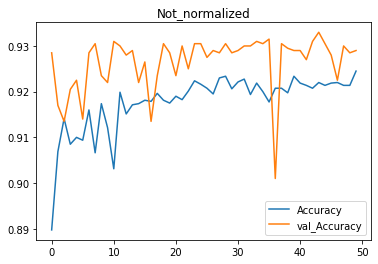

In [81]:
import pandas as pd

a = pd.DataFrame(history.history)
c = a.loc[:,['Accuracy','val_Accuracy']].plot(title = 'Not_normalized')


In [82]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.1704 - Accuracy: 0.9290


[0.17041461169719696, 0.9290000200271606]

## Change the learning rate asper the above graph and add the early stopping , dropout layers 

In [96]:
# Random seed
 
tf.random.set_seed(42)

# Model initialization

model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (2,)),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile the model

model3.compile(loss = tf.keras.losses.binary_crossentropy,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.2),
             metrics = ['Accuracy'])


# Creating a learning rate callback

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)
                                                       

ES = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True'
)
#Fit the model

history3 = model2.fit(X_train,y_train,
                     epochs = 25,
                    validation_data= (X_test,y_test),
                     callbacks = [ES])

Epoch 1/25
250/250 [==============================] - 1s 4ms/step - loss: 0.2108 - accuracy: 0.9178 - val_loss: 0.2179 - val_accuracy: 0.9140
Epoch 2/25
250/250 [==============================] - 1s 3ms/step - loss: 0.2194 - accuracy: 0.9131 - val_loss: 0.2101 - val_accuracy: 0.9170
Epoch 3/25
250/250 [==============================] - 1s 3ms/step - loss: 0.2121 - accuracy: 0.9180 - val_loss: 0.1830 - val_accuracy: 0.9280
Epoch 4/25
250/250 [==============================] - 1s 3ms/step - loss: 0.2061 - accuracy: 0.9181 - val_loss: 0.1915 - val_accuracy: 0.9255
Epoch 5/25
250/250 [==============================] - 1s 3ms/step - loss: 0.2006 - accuracy: 0.9218 - val_loss: 0.1706 - val_accuracy: 0.9330
Epoch 6/25
250/250 [==============================] - 1s 3ms/step - loss: 0.2150 - accuracy: 0.9189 - val_loss: 0.1755 - val_accuracy: 0.9280
Epoch 7/25
250/250 [==============================] - 1s 3ms/step - loss: 0.2133 - accuracy: 0.9164 - val_loss: 0.1805 - val_accuracy: 0.9300
Epoch 

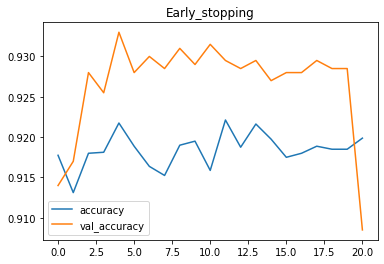

In [97]:
import pandas as pd

a = pd.DataFrame(history3.history)
c = a.loc[:,['accuracy','val_accuracy']].plot(title = 'Early_stopping')

In [91]:
a

,loss,accuracy,val_loss,val_accuracy
0,0.208097,0.917750,0.169190,0.9305
1,0.216402,0.916000,0.179066,0.9305
2,0.223401,0.911125,0.186800,0.9290
3,0.209424,0.917875,0.209175,0.9225
4,0.198586,0.922250,0.188991,0.9295
5,0.207257,0.921250,0.172810,0.9315
